## Import libraries and intitialize all parameters

In [1]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from map_utils import classification_mask, create_path_map

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel2").mundi_wms('L2A')

Define scl class legend. This will be used later to display the legend and interpret the terrain data.

In [2]:
legend_data = [[0, [0, 0, 0], 'No Data'],
              [1, [1, 0, 0.016], 'Saturated / Defective'],
              [2, [0.525, 0.525, 0.525], 'Dark Area'],
              [3, [0.467, 0.298, 0.043], 'Cloud shadows'],
              [4, [0.063, 0.827, 0.176], 'Vegetation'],
              [5, [1, 1, 0.325], 'Bare soil'],
              [6, [0, 0, 1], 'Water'],
              [7, [0.506, 0.506, 0.506], 'Clouds low probability / Unclassified'],
              [8, [0.753, 0.753, 0.753], 'Clouds medium probability'],
              [9, [0.949, 0.949, 0.949], 'Clouds high probability'],
              [10, [0.733, 0.773, 0.925], 'Cirrus'],
              [11, [0.325, 1, 0.980], 'Snow / Ice']]

legend_dict = dict()
for values in legend_data:
    legend_dict[values[0]] = values[2]


In [3]:
bbox = (1.0, 43.0, 1.1, 43.1)

Define WMS parameters. We define here the bounding box, dates and images size that will be used for this first use case.

In [4]:
_projection_ = 'EPSG:4326'
_bbox_       = bbox
_time_       = '2023-02-06/2023-02-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

### Display SLC mask with its legend

In [5]:
# scl_array = np.asarray(Image.open(img_scl))

handles = [
    Rectangle((0,0),1,1, color = c) for k,c,n in legend_data
]
labels = [n for k,c,n in legend_data]

# plt.imshow(scl_array)
# plt.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Now lets try to simulate a route 

We will use the layer SCL_GRAYSCALE to get the raw scl value.
Then define a route and display it by replacing the pixel values to red.

start  (255, 255)
end  (358, 409)
(512, 511, 1) (512, 511, 1)
0.0 0.0
start  (255, 255)
end  (358, 409)
(512, 511, 1) (512, 511, 1)
1.0 0.0


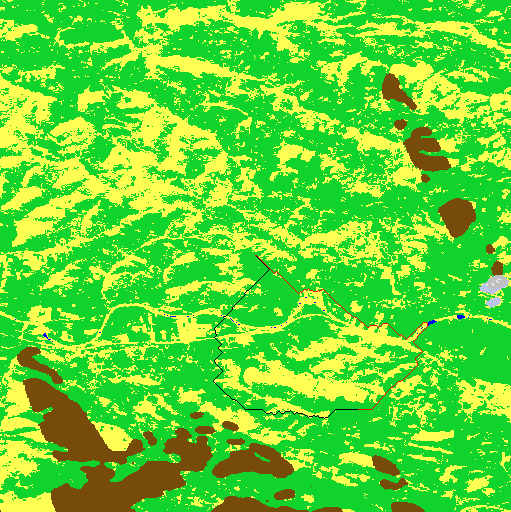

In [6]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

img_scl_raw = wms.getmap(layers=['SCL_GRAYSCALE'],
                     srs=_projection_,
                     bbox=_bbox_,
                     size=(_width_, _height_),
                     format='image/tiff',
                     time=_time_,
                     showlogo=False,
                     transparent=False)

scl_raw_array = np.asarray(Image.open(img_scl_raw))
scl_array = np.asarray(Image.open(img_scl))

start = (1.05, 43.05)
end = (1.07, 43.08)
bbox = bbox
path = create_path_map(start, end, scl_array, bbox, 512, [])

writable_array = scl_array.copy()

for (x, y) in path:
    writable_array[y, x][:] = [0, 0, 0]
    
path = create_path_map(start, end, scl_array, bbox, 512, [path])

for (x, y) in path:
    writable_array[y, x][:] = [255, 0, 0]
display(Image.fromarray(writable_array))
